<a href="https://colab.research.google.com/github/mboya2020/XGBoost_Model_for_House_Prices/blob/main/XGBoost_Model_for_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# @author: Patriciah N. Mboya
# Github: https://github.com/mboya2020
# linkedIn = "https://www.linkedin.com/in/patriciah-mboya/"
# email = "mboyapatricia@ymail.com"

## **`BUILDING AN XGBOOST MODEL USING HOUSE PRICES`**

### ***`Loading Data`***

In [ ]:
# connecting collab to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing relevant libraries

import pandas as pd
import numpy as np

# viz tools
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning tools

import xgboost as xgb
from xgboost import plot_importance

# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# tensorflow
import os

#!pip install shap
import shap

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/Assessment_Part_2_Mboya'
os.chdir(folder_path)

# 'SalePrice' is the target variable
target_column = 'SalePrice'

# Load the train and test data sets

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


### ***`Data Cleaning`***

In [ ]:
# checking for missing values in the train and test dataset

missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

# Display the missing values for the train and test dataset
print("Missing values in the train dataset:")
print(missing_train[missing_train > 0])
print("\nMissing values in the test dataset:")
print(missing_test[missing_test > 0])


Missing values in the train dataset:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Missing values in the test dataset:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFini

In [ ]:
# filling missing values with zeros

train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

### ***`Data Preprocessing`***

In [ ]:
# identifying numerical and categorical features in train and test data

# identifing numerical features
numerical_cols_train = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols_test = test_data.select_dtypes(include=['int64', 'float64']).columns

print("Numerical features in train_data:", numerical_cols_train)
print("\nNumerical features in test_data:", numerical_cols_test)

# identify categorical features

categorical_cols_train = train_data.select_dtypes(include=['object']).columns
categorical_cols_test = test_data.select_dtypes(include=['object']).columns

print("Categorical features in train_data:", categorical_cols_train)
print("\nCategorical features in test_data:", categorical_cols_test)


Numerical features in train_data: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Numerical features in test_data: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr',

In [ ]:
# separating  target from predictors

y_train = train_data.SalePrice
X_train = train_data.drop(['SalePrice'], axis=1)

# since the test data does not have the target variable, we use it as is

X_test = test_data



In [ ]:
numerical_features = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

# Preprocessing steps

numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
test_processed = preprocessor.transform(test_data)

### ***`Creating a DMatrix`***

In [ ]:
# Convert processed feature datasets to DMatrix, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train_processed, label=y_train)


### ***`Initializing an XGBoost Regressor`***

In [ ]:
# Define the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')


In [ ]:
# Grid of parameters to choose from
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 150, 200],
    'subsample': [0.8, 0.9, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_processed, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

### ***`Grid Search Optimization`***

In [ ]:
# Best parameters
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

### ***`Model Explainability with SHAP values`***

[07:46:58] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


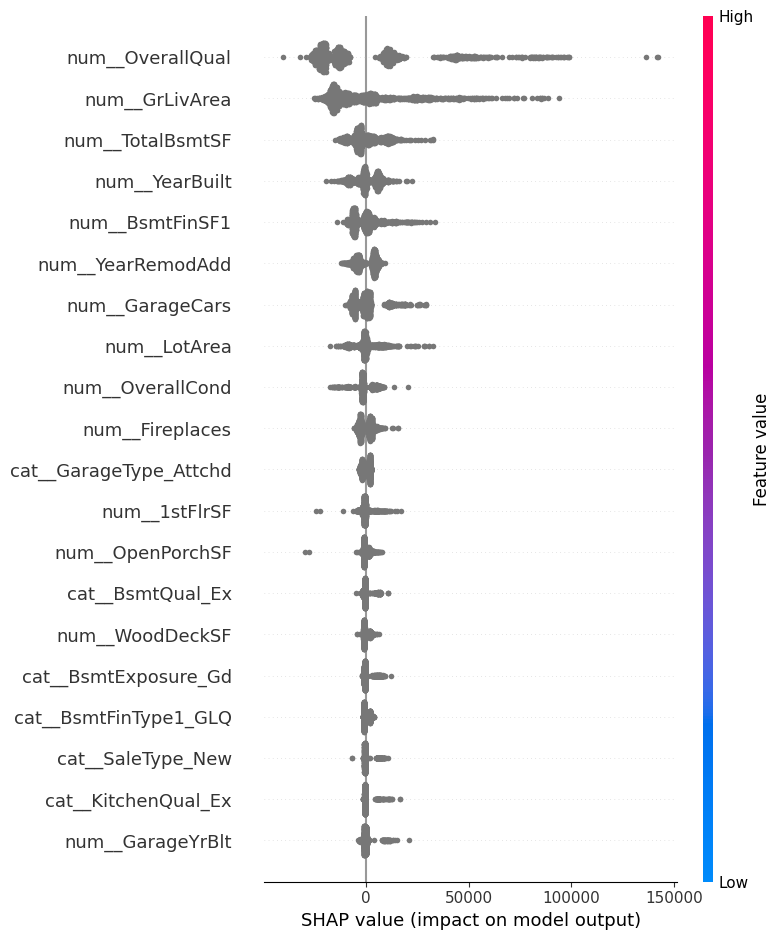

In [ ]:
# Model Explainability with SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_processed)

# Plotting SHAP summary plot
shap.summary_plot(shap_values, X_train_processed, feature_names=preprocessor.get_feature_names_out());

### ***`Predictions on Test Data`***

In [ ]:
# Making predictions on test data

predictions = best_model.predict(test_processed)
predictions


array([119890.46, 165319.06, 177246.61, ..., 162040.58, 115903.32,
       232081.33], dtype=float32)

**Observations**


1.   `*The XGBoost model predicts a range of the house prices providing a variability in the models prediction*`



### ***`File Containing the Predictions`***

In [ ]:
# Save predictions to a CSV file
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
output.to_csv('house_prices_predictions.csv', index=False)